In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('drive/MyDrive/DSML Datasets/video_games.csv')
df = pd.read_csv('./Datasets/flight_review.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
# selecting all column names
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
# give statistical data about csv
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [7]:
df.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875
Seat comfort,0.049212,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.033030


<AxesSubplot:>

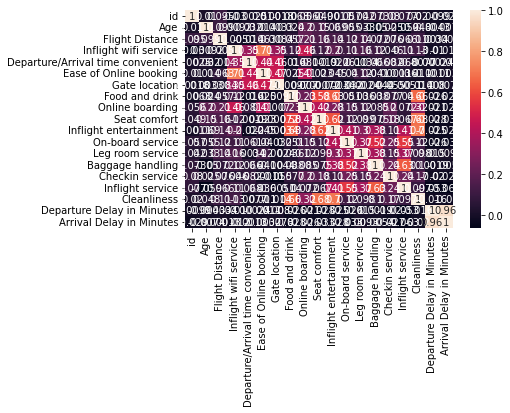

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

array([[<AxesSubplot:title={'center':'Ease of Online booking'}>]],
      dtype=object)

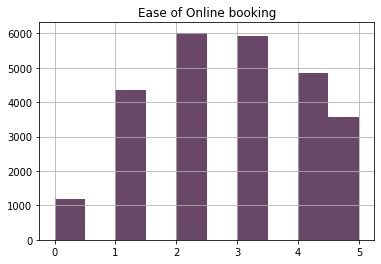

In [12]:
df.hist(column='Ease of Online booking', color='#684866')

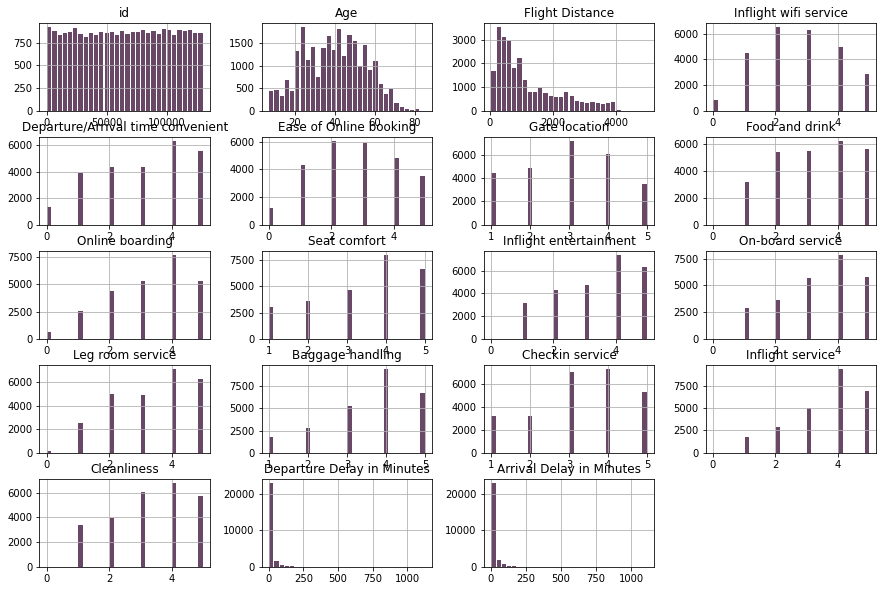

In [13]:
df.hist(rwidth=0.8, color='#684866', bins=30, figsize=(15, 10))
plt.show()

In [14]:
df.shape

(25893, 24)

In [15]:
# Removing outliers using z-score

from scipy import stats

df = df[
    (np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 2).all(axis=1)
]

In [16]:
df.shape

(19305, 24)

In [17]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['Gender'] = lb.fit_transform(df['Gender'])
df['Customer Type'] = lb.fit_transform(df['Customer Type'])
df['Type of Travel'] = lb.fit_transform(df['Type of Travel'])
df['Class'] = lb.fit_transform(df['Class'])
df['satisfaction'] = lb.fit_transform(df['satisfaction'])


In [18]:
feature_df = df.drop(columns=['satisfaction', 'id'])
feature_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
7,0,0,43,0,0,2556,2,2,2,2,...,5,4,4,4,4,5,4,3,77,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,0,1,36,0,1,432,1,5,1,3,...,4,4,5,2,5,2,3,4,0,0.0
25971,1,1,34,0,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,0,0,17,1,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0


In [19]:
label_df = df['satisfaction']
label_df

0        1
1        1
2        0
4        1
7        1
        ..
25970    0
25971    0
25972    1
25973    0
25974    1
Name: satisfaction, Length: 19305, dtype: int32

In [20]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df,test_size=0.3)

In [21]:
print("The size of Training 'X' is", X_train.shape)
print("The size of Training 'y' is", y_train.shape)
print("The size of Testing 'X' is", X_test.shape)
print("The size of Testing 'y' is", y_test.shape)

The size of Training 'X' is (13513, 22)
The size of Training 'y' is (13513,)
The size of Testing 'X' is (5792, 22)
The size of Testing 'y' is (5792,)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression(solver='saga', max_iter=500)
LogisticModel.fit(X_train, y_train)

c:\Users\vipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [24]:
logistic_y_predict = LogisticModel.predict(X_test)
logistic_y_predict

array([1, 0, 0, ..., 1, 0, 1])

In [25]:
cm = np.array(confusion_matrix(y_test, logistic_y_predict, labels=[1,0]))

confusion_logistic = pd.DataFrame(cm, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

confusion_logistic

,predicted_satisfied,predicted_unsatisfied
is_satisfied,1819,617
is_unsatisfied,610,2746


<AxesSubplot:>

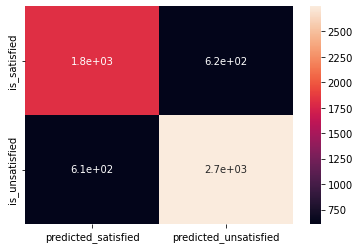

In [26]:
sns.heatmap(confusion_logistic, annot=True)

In [27]:
print(classification_report(y_test, logistic_y_predict))
LRAcc = accuracy_score(logistic_y_predict, y_test)
print('Logistic Regression accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3356
           1       0.75      0.75      0.75      2436

    accuracy                           0.79      5792
   macro avg       0.78      0.78      0.78      5792
weighted avg       0.79      0.79      0.79      5792

Logistic Regression accuracy: 78.82%


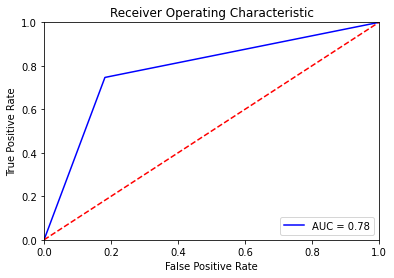

In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, logistic_y_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Support Vector Machine

In [29]:
from sklearn.svm import SVC
svmModel_rbf = SVC(kernel="rbf")
svmModel_rbf.fit(X_train, y_train)


SVC()

In [30]:
# svmModel_linear = SVC(kernel="linear")
# svmModel_linear.fit(X_train, y_train)

In [31]:
svm_rbf_ypredict = svmModel_rbf.predict(X_test)
svm_rbf_ypredict

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
cm = np.array(confusion_matrix(y_test, svm_rbf_ypredict, labels=[1,0]))

confusion_svm_rbf = pd.DataFrame(cm, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for SVM (kernal: RBF)")
confusion_svm_rbf

Confusion Matrix for SVM (kernal: RBF)


,predicted_satisfied,predicted_unsatisfied
is_satisfied,1011,1425
is_unsatisfied,499,2857


<AxesSubplot:>

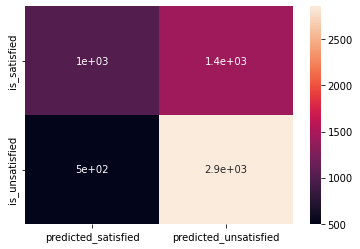

In [33]:
sns.heatmap(confusion_svm_rbf, annot=True)

In [34]:
print(classification_report(y_test, svm_rbf_ypredict))
SVM_rbf_Acc = accuracy_score(svm_rbf_ypredict, y_test)
print('SVM (kernel = RBF) accuracy: {:.2f}%'.format(SVM_rbf_Acc*100))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      3356
           1       0.67      0.42      0.51      2436

    accuracy                           0.67      5792
   macro avg       0.67      0.63      0.63      5792
weighted avg       0.67      0.67      0.65      5792

SVM (kernel = RBF) accuracy: 66.78%


SVM POLY kernal

In [35]:
svmModel_poly = SVC(kernel="poly")
svmModel_poly.fit(X_train, y_train)


SVC(kernel='poly')

In [36]:
svm_poly_ypred = svmModel_poly.predict(X_test)
svm_poly_ypred

array([0, 0, 0, ..., 0, 1, 0])

In [37]:
cm_poly = np.array(confusion_matrix(y_test, svm_poly_ypred, labels=[1,0]))

confusion_svm_poly = pd.DataFrame(cm_poly, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for SVM (kernal: RBF)")
confusion_svm_poly

Confusion Matrix for SVM (kernal: RBF)


,predicted_satisfied,predicted_unsatisfied
is_satisfied,825,1611
is_unsatisfied,234,3122


In [38]:
print(classification_report(y_test, svm_poly_ypred))
SVM_poly_Acc = accuracy_score(svm_poly_ypred, y_test)
print('SVM (kernel = RBF) accuracy: {:.2f}%'.format(SVM_poly_Acc*100))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      3356
           1       0.78      0.34      0.47      2436

    accuracy                           0.68      5792
   macro avg       0.72      0.63      0.62      5792
weighted avg       0.71      0.68      0.65      5792

SVM (kernel = RBF) accuracy: 68.15%


In [39]:
svmModel_sigmoid = SVC(kernel="sigmoid")
svmModel_sigmoid.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [40]:
svm_sigmoid_ypred = svmModel_sigmoid.predict(X_test)
svm_sigmoid_ypred

array([1, 1, 0, ..., 1, 0, 1])

In [41]:
cm_sigmoid = np.array(confusion_matrix(y_test, svm_sigmoid_ypred, labels=[1,0]))

confusion_svm_sigmoid = pd.DataFrame(cm_sigmoid, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for SVM (kernal:sigmoid)")
confusion_svm_sigmoid

Confusion Matrix for SVM (kernal:sigmoid)


,predicted_satisfied,predicted_unsatisfied
is_satisfied,773,1663
is_unsatisfied,1711,1645


In [42]:
print(classification_report(y_test, svm_sigmoid_ypred))
SVM_sigmoid_Acc = accuracy_score(svm_sigmoid_ypred, y_test)
print('SVM (kernel = RBF) accuracy: {:.2f}%'.format(SVM_sigmoid_Acc*100))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      3356
           1       0.31      0.32      0.31      2436

    accuracy                           0.42      5792
   macro avg       0.40      0.40      0.40      5792
weighted avg       0.42      0.42      0.42      5792

SVM (kernel = RBF) accuracy: 41.75%


KNN K-Nearest Neighbour

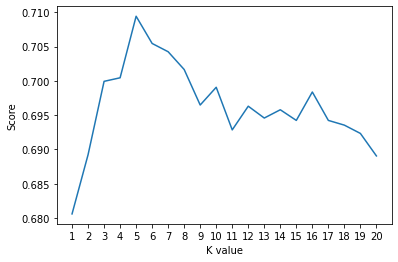

KNN best accuracy: 70.94%


In [43]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []

for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    knn_ypred = KNclassifier.score(X_test, y_test)
    scoreListknn.append(knn_ypred)
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Decision Tree

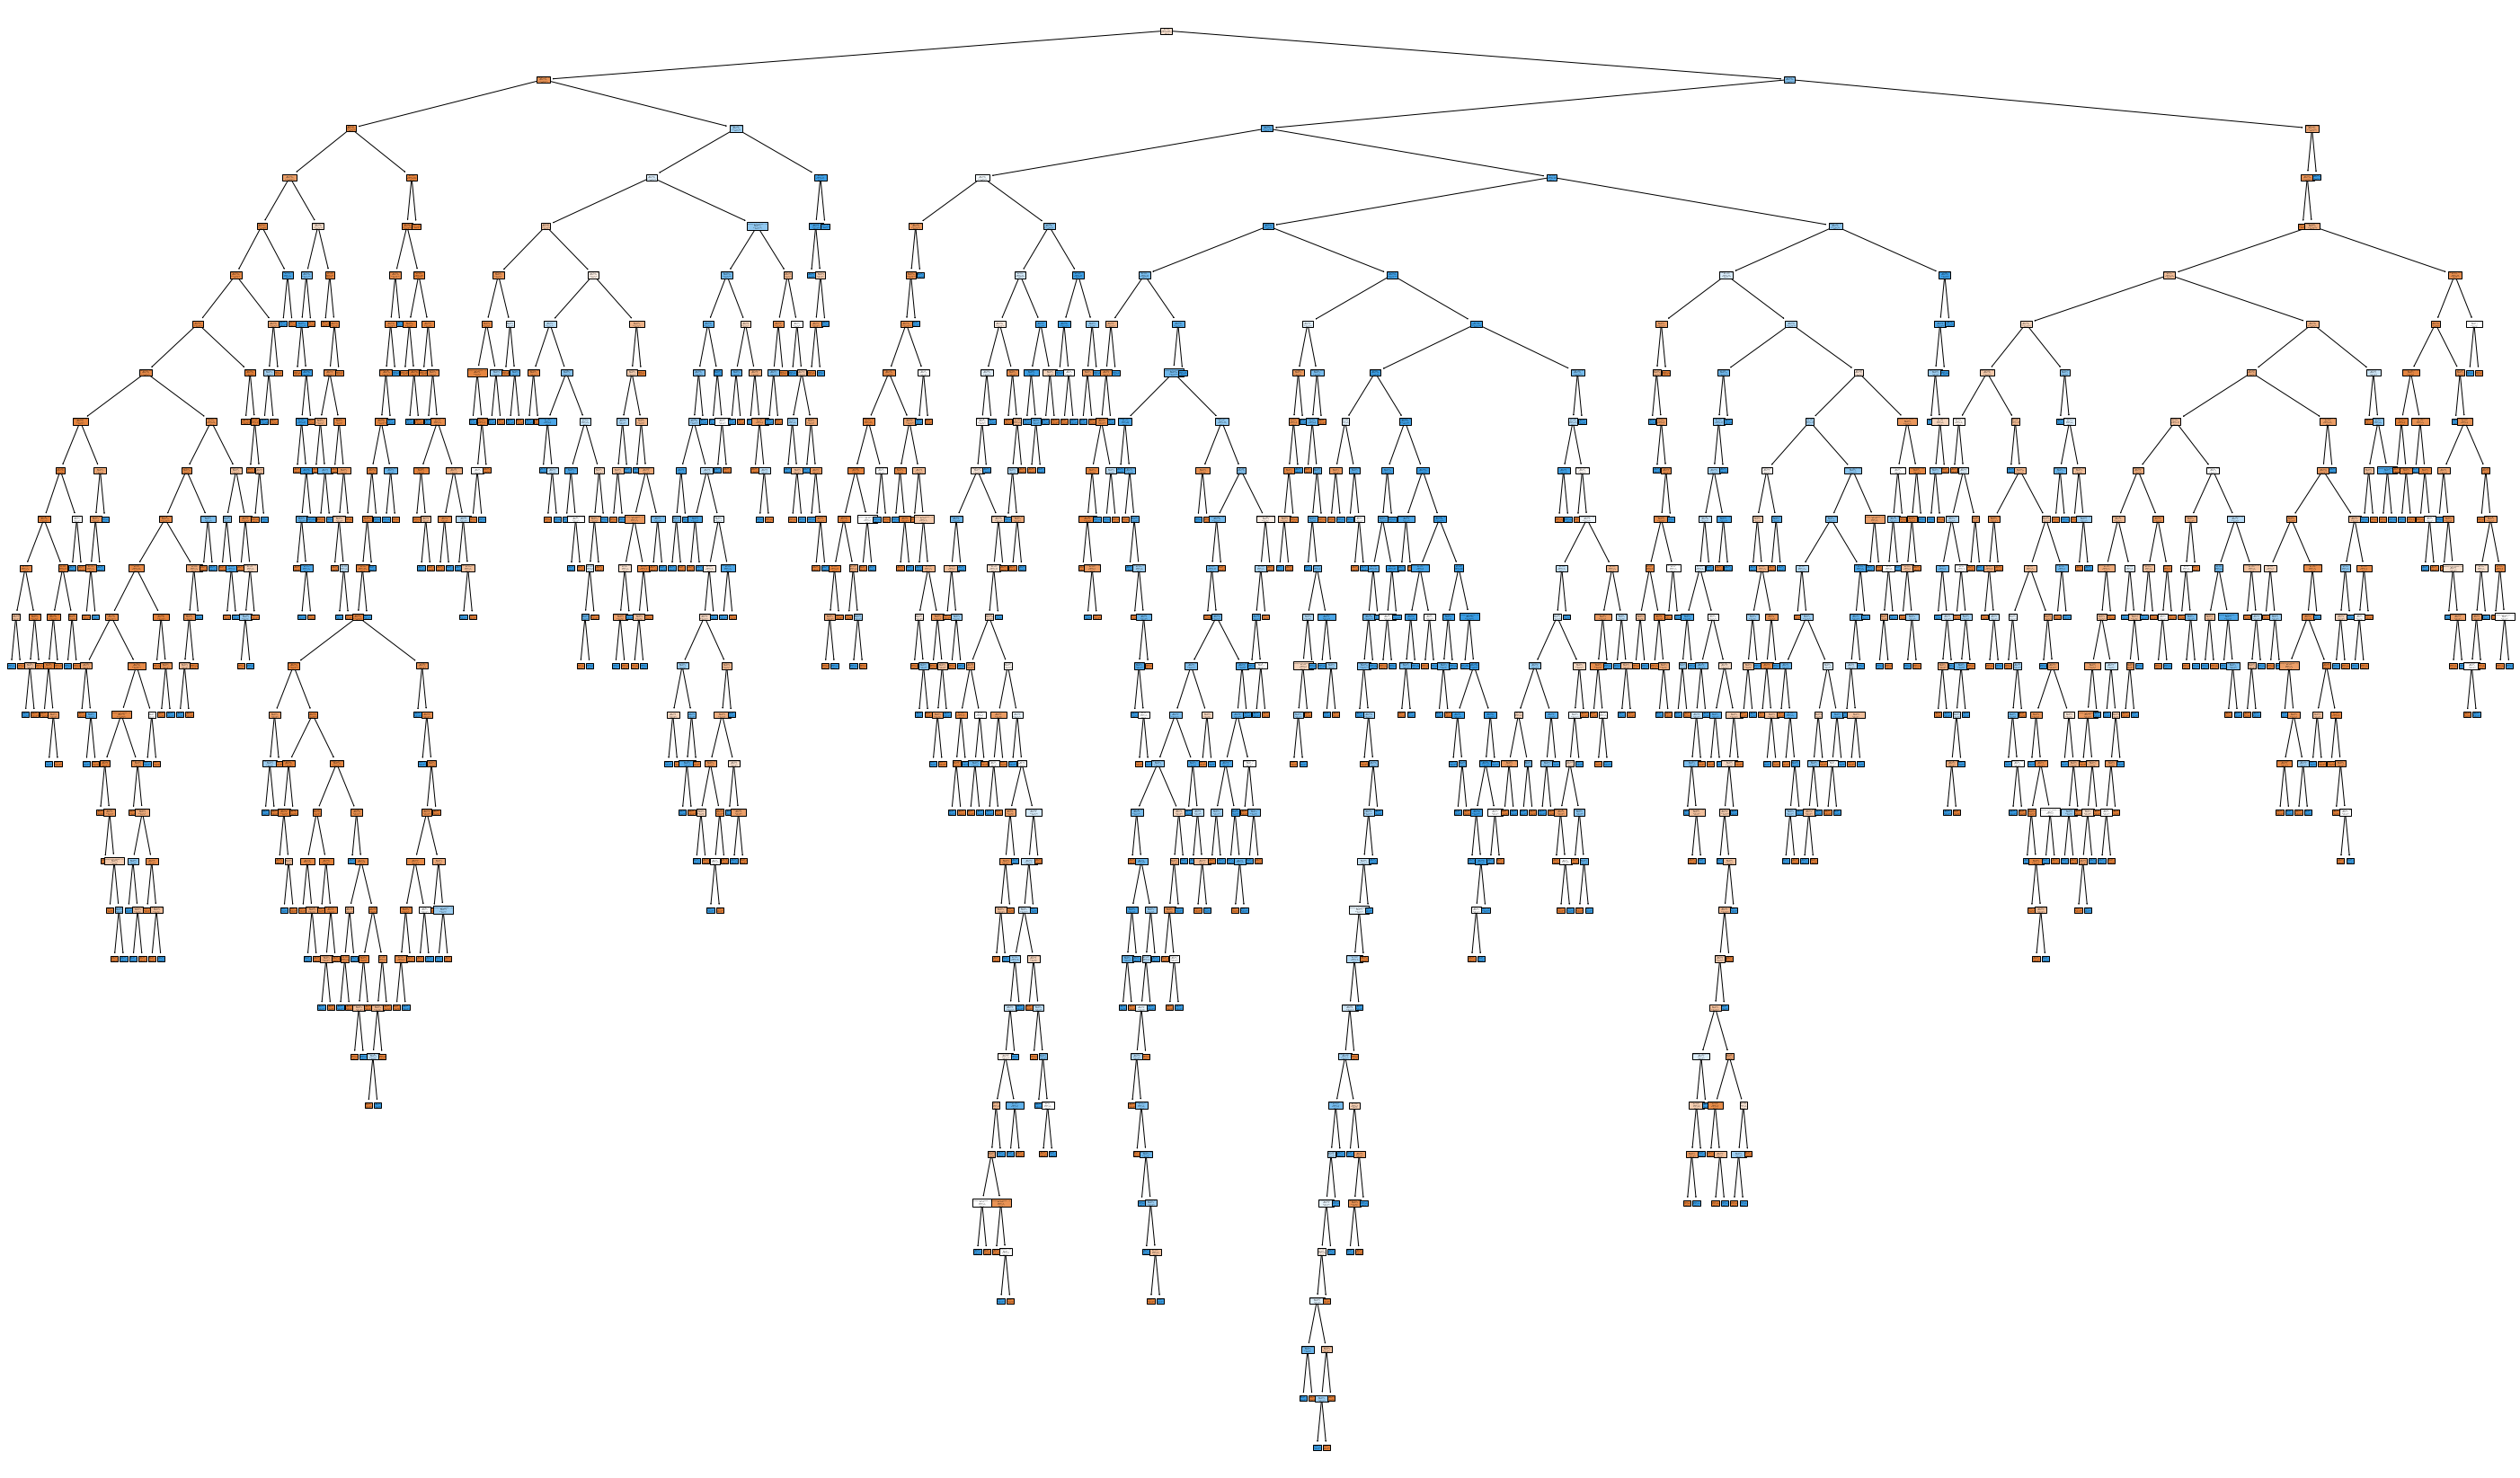

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

fig = plt.figure(figsize=(50,30))

tree.plot_tree(decision_model, feature_names=feature_df.columns,filled=True,class_names=['0','1'])

fig.savefig("decision_tree.png")

In [45]:
decision_ypred = decision_model.predict(X_test)
decision_ypred

array([1, 0, 0, ..., 1, 1, 1])

In [46]:
cm_decision = np.array(confusion_matrix(y_test, decision_ypred, labels=[1,0]))
decision_confusion = pd.DataFrame(cm_decision, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])
decision_confusion



,predicted_satisfied,predicted_unsatisfied
is_satisfied,2261,175
is_unsatisfied,194,3162


In [47]:
print(classification_report(y_test, decision_ypred))
decision_Acc = accuracy_score(decision_ypred, y_test)
print('Decision Tree accuracy: {:.2f}%'.format(decision_Acc*100))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3356
           1       0.92      0.93      0.92      2436

    accuracy                           0.94      5792
   macro avg       0.93      0.94      0.93      5792
weighted avg       0.94      0.94      0.94      5792

Decision Tree accuracy: 93.63%


Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

gnb_ypred = gnb_model.predict(X_test)


In [49]:
cm_gnb = np.array(confusion_matrix(y_test, gnb_ypred, labels=[1,0]))

confusion_gnb = pd.DataFrame(cm_gnb, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Gaussian Naive Bayes")
confusion_gnb

Confusion Matrix for Gaussian Naive Bayes


,predicted_satisfied,predicted_unsatisfied
is_satisfied,2043,393
is_unsatisfied,273,3083


In [50]:
print(classification_report(y_test, gnb_ypred))
gnb_Acc = accuracy_score(gnb_ypred, y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(gnb_Acc*100))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3356
           1       0.88      0.84      0.86      2436

    accuracy                           0.89      5792
   macro avg       0.88      0.88      0.88      5792
weighted avg       0.88      0.89      0.88      5792

Gaussian Naive Bayes accuracy: 88.50%


Classifier Naive Bayes

In [51]:
from sklearn.naive_bayes import CategoricalNB
cnb_model = CategoricalNB(min_categories=feature_df.nunique())
cnb_model.fit(X_train, y_train)


CategoricalNB(min_categories=Gender                                  2
Customer Type                           2
Age                                    60
Type of Travel                          2
Class                                   3
Flight Distance                      2479
Inflight wifi service                   5
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          5
Online boarding                         5
Seat comfort                            5
Inflight entertainment                  5
On-board service                        5
Leg room service                        5
Baggage handling                        4
Checkin service                         5
Inflight service                        4
Cleanliness                             5
Departure Delay in Minutes             89
Arrival Delay in Minutes               90
dtype: int64)

In [52]:
cnb_ypred = cnb_model.predict(X_test)

In [53]:
cm_cnb = np.array(confusion_matrix(y_test, cnb_ypred, labels=[1,0]))

confusion_cnb = pd.DataFrame(cm_cnb, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Categorical Naive Bayes")
confusion_cnb

Confusion Matrix for Categorical Naive Bayes


,predicted_satisfied,predicted_unsatisfied
is_satisfied,2119,317
is_unsatisfied,304,3052


In [54]:
print(classification_report(y_test, cnb_ypred))
cnb_Acc = accuracy_score(cnb_ypred, y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(cnb_Acc*100))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3356
           1       0.87      0.87      0.87      2436

    accuracy                           0.89      5792
   macro avg       0.89      0.89      0.89      5792
weighted avg       0.89      0.89      0.89      5792

Categorical Naive Bayes accuracy: 89.28%


Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=69, random_state=7,max_depth=15)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=69, random_state=7)

In [56]:
rf_ypred = rf_model.predict(X_test)

cm_rf = np.array(confusion_matrix(y_test, rf_ypred, labels=[1,0]))

confusion_rf = pd.DataFrame(cm_rf, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Random Forest")
confusion_rf

Confusion Matrix for Random Forest


,predicted_satisfied,predicted_unsatisfied
is_satisfied,2274,162
is_unsatisfied,120,3236


In [57]:
print(classification_report(y_test, rf_ypred))
rf_Acc = accuracy_score(rf_ypred, y_test)
print('Random Forest accuracy: {:.2f}%'.format(rf_Acc*100))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3356
           1       0.95      0.93      0.94      2436

    accuracy                           0.95      5792
   macro avg       0.95      0.95      0.95      5792
weighted avg       0.95      0.95      0.95      5792

Random Forest accuracy: 95.13%


Gradient Boost

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

gb = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=35)
gb.fit(X_train, y_train)

RandomizedSearchCV(cv=35, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [59]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

gby_pred = GBclassifier.predict(X_test)

cm_gb = np.array(confusion_matrix(y_test, gby_pred, labels=[1,0]))

confusion_gb = pd.DataFrame(cm_gb, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Gradient Boosting")
confusion_gb

print(classification_report(y_test, gby_pred))

GBAcc = accuracy_score(gby_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

Confusion Matrix for Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3356
           1       0.95      0.94      0.95      2436

    accuracy                           0.95      5792
   macro avg       0.95      0.95      0.95      5792
weighted avg       0.95      0.95      0.95      5792

Gradient Boosting accuracy: 95.42%


Extreme Gradient Boost

In [60]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,  reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)

cm_xgb = np.array(confusion_matrix(y_test, xgb_ypred, labels=[1,0]))

confusion_xgb = pd.DataFrame(cm_xgb, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Extreme Gradient Boosting")
confusion_xgb

print(classification_report(y_test, xgb_ypred))

XGBAcc = accuracy_score(xgb_ypred,y_test)
print('Extreme Gradient Boosting accuracy: {:.2f}%'.format(XGBAcc*100))

Confusion Matrix for Extreme Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3356
           1       0.94      0.92      0.93      2436

    accuracy                           0.94      5792
   macro avg       0.94      0.94      0.94      5792
weighted avg       0.94      0.94      0.94      5792

Extreme Gradient Boosting accuracy: 94.01%


Summary

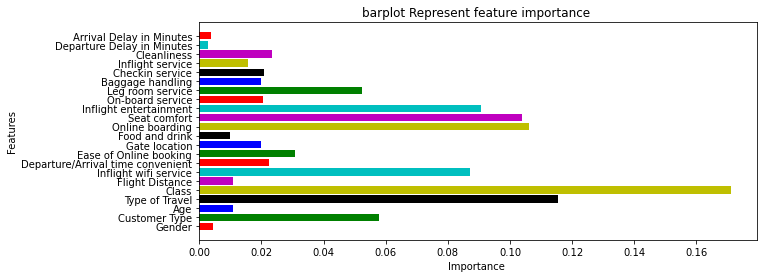

In [61]:
imp_feature = pd.DataFrame({'Feature': ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], 'Importance': xgb_model.feature_importances_})

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")

plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])

plt.show()

In [62]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM (kernal=rbf)', 'SVM (kernal=poly)', 'SVM (kernal=sigmoid)', 'K Neighbors', 'Decision Tree', 'Categorical NB', 'Gaussian NB', 'Random Forest', 'Gradient Boost', 'Extreme Gradient Boost'], 
                        
    'Accuracy': [LRAcc*100, SVM_rbf_Acc*100, SVM_poly_Acc*100, SVM_sigmoid_Acc*100, KNAcc*100, decision_Acc*100, gnb_Acc*100, cnb_Acc*100, rf_Acc*100, GBAcc*100, XGBAcc*100]})

compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
9,Gradient Boost,95.424724
8,Random Forest,95.131215
10,Extreme Gradient Boost,94.008978
5,Decision Tree,93.629144
7,Gaussian NB,89.278315
6,Categorical NB,88.501381
0,Logistic Regression,78.815608
4,K Neighbors,70.942680
2,SVM (kernal=poly),68.145718
1,SVM (kernal=rbf),66.781768


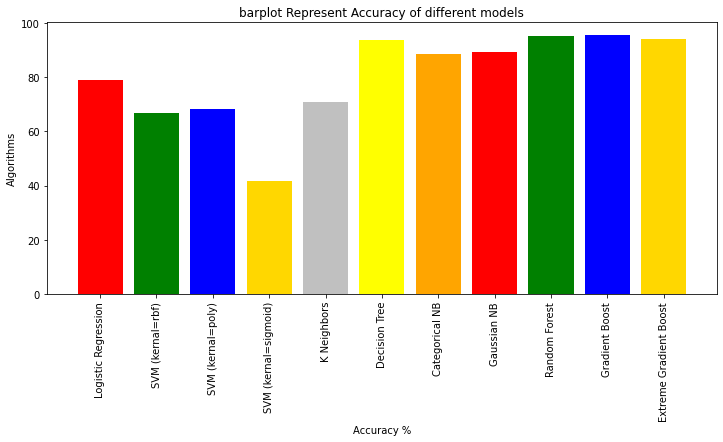

In [67]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(compare['Model'],compare['Accuracy'],color = colors)
plt.xticks(rotation=90)
plt.show()

input - ai ai webpage
take

fruits claasifications and diseases

priyanka.more@viit.ac.in